## PCA(주성분 분석)
---
- 전체 특성(Feature)에서 주요 특성(Feature) 압축/융합하는 비지도 학습
- fit() + transform() 2단계 거쳐 주성분 분석

In [113]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

## [1] 데이터 준비
---

In [114]:
X,y=load_iris(return_X_y=True, as_frame=True)

In [115]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

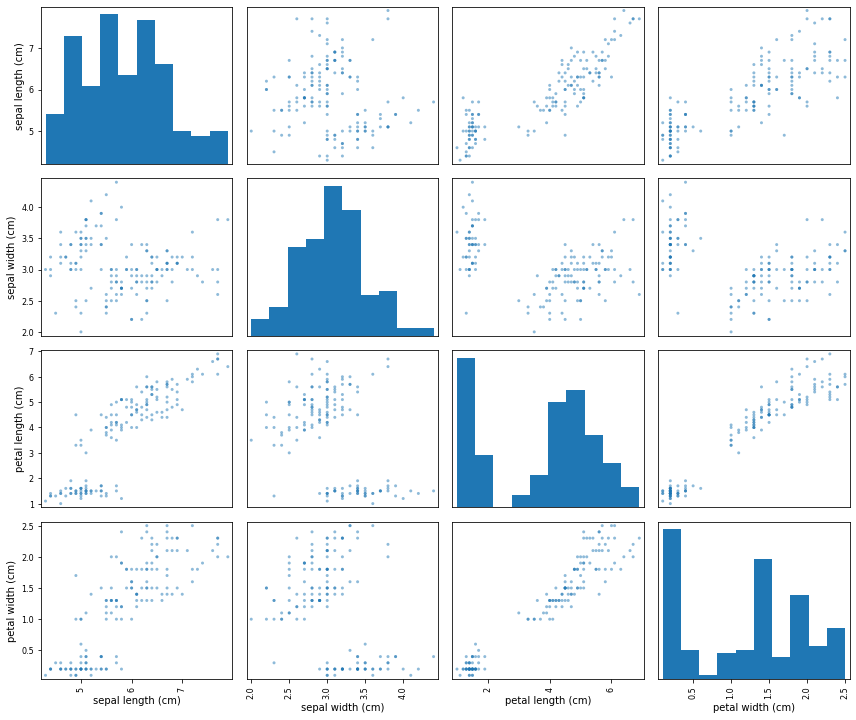

In [116]:
scatter_matrix(X, figsize=(12,10))
plt.tight_layout()
plt.show()

In [118]:
irisDF=pd.concat([X,y], axis=1)
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [119]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [120]:
# 타겟별 시각화
target_0=irisDF[irisDF.target == 0]
target_1=irisDF[irisDF.target == 1]
target_2=irisDF[irisDF.target == 2]

In [121]:
target_0.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


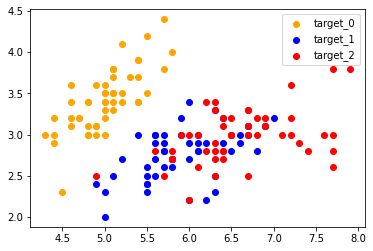

In [122]:
plt.scatter(target_0['sepal length (cm)'], target_0['sepal width (cm)'], c='orange')
plt.scatter(target_1['sepal length (cm)'], target_1['sepal width (cm)'], c='blue')
plt.scatter(target_2['sepal length (cm)'], target_2['sepal width (cm)'], c='red')
plt.legend(['target_0', 'target_1', 'target_2'])
plt.show()

## 데이터 전처리

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
irisDF[irisDF.columns[:-1]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [125]:
scaler=StandardScaler()
scaler.fit(irisDF[irisDF.columns[:-1]])
X_scaled=scaler.transform(X)

## PCA 주성분 분석
---
- iris의 4개 Feature 중에서 주성분 데이터 추출

In [126]:
pca=PCA()

In [127]:
# 지정된 데이터에서 주성분 추출
pca.fit(X_scaled)

PCA()

In [128]:
# 주성분 행렬
pca.singular_values_

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [129]:
# 주성분에 투영 후 분산 정도 설명
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [130]:
# 주성분에 투영 후 분산 정도 설명
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

## 주성분 개수 지정
---
- 방법1) explained_variance_ratio_의 누적값에서 원하는 분포정도 지정해서 PC개수 계산
- 방법2) n_componets = 0.0-1.0 : 주성분 투영된 데이터 분포 정도 지정하면 PC개수 자동 계산

### 방법[1] : explained_variance_ratio_ 누적값으로 PC 차원수 계산

In [131]:
import numpy as np

In [132]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

print(f'주성분 개수(차원) : {d}')

주성분 개수(차원) : 2


In [133]:
## 지정된 PC 개수로 주성분 데이터 압축/융합
pca=PCA(n_components=d)

In [134]:
pca.fit(X_scaled)

PCA(n_components=2)

In [135]:
irisPCA=pca.transform(X_scaled)

In [136]:
irisPCA.shape

(150, 2)

In [137]:
irisPCA[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

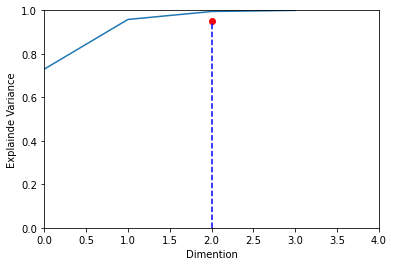

In [138]:
## 주성분과 데이터 투영 분산 정도 시각화
plt.plot(cumsum)
plt.plot(d, 0.95, 'ro')
plt.plot([2.0, 2.0], [0, 0.95], 'b--')
plt.axis([0, 4, 0, 1])
plt.xlabel('Dimention')
plt.ylabel('Explained Variance')
plt.show()

### 방법[2] : n_components=비율값

In [139]:
pca3=PCA(n_components=0.95)

In [140]:
pca3.fit(X_scaled)

PCA(n_components=0.95)

In [141]:
pca3.explained_variance_, pca3.explained_variance_ratio_

(array([2.93808505, 0.9201649 ]), array([0.72962445, 0.22850762]))

In [142]:
irisPCA3=pca3.transform(X_scaled)
irisPCA3.shape

(150, 2)

In [143]:
irisPCADF=pd.DataFrame(irisPCA3, columns=['pca_1', 'pca_2'])

In [144]:
irisPCADF.head()

,pca_1,pca_2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [145]:
irisPCADF=pd.concat([irisPCADF, y], axis=1)

In [146]:
irisPCADF.head()

,pca_1,pca_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [147]:
# 타겟별 시각화
target_0=irisPCADF[irisPCADF.target == 0]
target_1=irisPCADF[irisPCADF.target == 1]
target_2=irisPCADF[irisPCADF.target == 2]

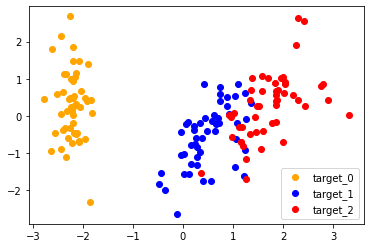

In [148]:
plt.scatter(target_0['pca_1'], target_0['pca_2'], c='orange')
plt.scatter(target_1['pca_1'], target_1['pca_2'], c='blue')
plt.scatter(target_2['pca_1'], target_2['pca_2'], c='red')
plt.legend(['target_0', 'target_1', 'target_2'])
plt.show()

In [149]:
re=pca3.inverse_transform(irisPCA)

In [150]:
re.shape

(150, 4)